In [1]:
import xarray as xr
import sys
sys.path.append("/home/atuin/c104fa/c104fa10/utils")
import tctools2 as tct
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pyproj
pyproj.datadir.set_data_dir("/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/share/proj") ## This line is needed to allow geopandas imports
# import cartopy.crs as ccrs
# import pandas as pd
import pickle

/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
dataPath = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/data/mjoClassFracs."
totalLoc = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/data/mjoClassTotals.pkl"

directions = [40,45,50]
sizes = [750,1000,1500]
thresholds = [60,70,80]

lonMin = 25
lonMax = 35
latMin = -12
latMax = -8

# nyears = 

In [3]:
avgs = []

for dir in directions:
    for size in sizes:
        for threshold in thresholds:
            filePath = f"{dataPath}dir.{dir}_thresh.{threshold}_size.{size}.nc"
            ds = xr.open_dataset(filePath)

            ds = ds.drop_vars(["level","quantile"])

            box = ds.sel(latitude=slice(latMax,latMin),longitude=slice(lonMin,lonMax))
            boxAvg = box.mean(dim=["longitude","latitude"])

            # boxAvg.assign_coords({"dir":dir,"size":size,"threshold":threshold})

            boxAvg = boxAvg.expand_dims(dir=1).assign_coords(dir=[dir])#("dir",[dir]))
            boxAvg = boxAvg.expand_dims(size=1).assign_coords(size=[size])#("size",[size]))
            boxAvg = boxAvg.expand_dims(threshold=1).assign_coords(threshold=[threshold])#("threshold",[threshold]))

            avgs.append(boxAvg)

In [4]:
combined = xr.combine_by_coords(avgs)

with open(totalLoc, "rb") as f:
    seasonTotals = pickle.load(f)


seasons = ["JF","MAM","JJAS","OND"]

years = np.arange(1980,2023)

for seasonix, season in enumerate(seasons):
    for MJOix, MJO_class in enumerate(combined["MJO_class"].values):

        seasonClassNumberDays = seasonTotals[season][MJO_class] # number of days in that class and season

        nmonths = len(season)

        seasonClassNumberDaysPerMonth = seasonClassNumberDays / (nmonths*len(years)) # average number of days in that class and season per month

        combined[season].loc[:,:,:,MJO_class] *=  seasonClassNumberDaysPerMonth

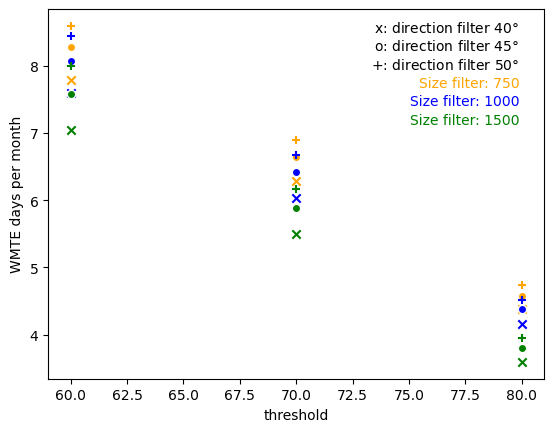

In [5]:
seasonal = combined["JF"].sum(dim="MJO_class")

directions = seasonal["dir"].values
thresholds = seasonal["threshold"].values
sizes = seasonal["size"].values

markers = ["x","o","+"]
colours = ["orange", "blue", "green"]

fig,ax = plt.subplots(1,1)

for dirix,dir in enumerate(directions):

    for sizeix,size in enumerate(sizes):
        data= seasonal.sel(dir=dir,size=size)

        data.plot.scatter(x="threshold",marker=markers[dirix],c=colours[sizeix],ax=ax)#,title=None)

plt.title(None)
plt.ylabel("WMTE days per month")
textOriginY = 0.95
textIntY = 0.05
textOriginX = 0.95
ypos = textOriginY
for dirix,dir in enumerate(directions):
    ax.text(s=f"{markers[dirix]}: direction filter {dir}$\degree$",x=textOriginX,y=ypos,va="center",ha="right",transform=ax.transAxes)
    ypos -= textIntY

for sizeix,size in enumerate(sizes):
    ax.text(s=f"Size filter: {size}",x=textOriginX,y=ypos,va="center",ha="right",transform=ax.transAxes,c=colours[sizeix])
    ypos -= textIntY

#### Rate of change for the different variables

In [6]:
dataPath = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/data/mjoClassFracs."
totalLoc = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/data/mjoClassTotals.pkl"

directions = [40,45,50]
sizes = [750,1000,1500]
thresholds = [60,70,80]

lonMin = 25
lonMax = 35
latMin = -13
latMax = -7

In [7]:
data = []

for dir in directions:
    for size in sizes:
        for threshold in thresholds:
            filePath = f"{dataPath}dir.{dir}_thresh.{threshold}_size.{size}.nc"
            ds = xr.open_dataset(filePath)

            ds = ds.drop_vars(["level","quantile"])

            box = ds.sel(latitude=slice(latMax,latMin),longitude=slice(lonMin,lonMax))

            # boxAvg.assign_coords({"dir":dir,"size":size,"threshold":threshold})

            box = box.expand_dims(dir=1).assign_coords(dir=[dir])#("dir",[dir]))
            box = box.expand_dims(size=1).assign_coords(size=[size])#("size",[size]))
            box = box.expand_dims(threshold=1).assign_coords(threshold=[threshold])#("threshold",[threshold]))

            data.append(box)

In [8]:
combined = xr.combine_by_coords(data)

with open(totalLoc, "rb") as f:
    seasonTotals = pickle.load(f)


seasons = ["JF","MAM","JJAS","OND"]

years = np.arange(1980,2023)

for seasonix, season in enumerate(seasons):
    for MJOix, MJO_class in enumerate(combined["MJO_class"].values):

        seasonClassNumberDays = seasonTotals[season][MJO_class] # number of days in that class and season

        nmonths = len(season)

        seasonClassNumberDaysPerMonth = seasonClassNumberDays / (nmonths*len(years)) # average number of days in that class and season per month

        combined[season].loc[:,:,:,MJO_class] *=  seasonClassNumberDaysPerMonth

In [9]:
combined["JF"].sum(dim="MJO_class")

<xarray.DataArray 'JF' (threshold: 3, size: 3, dir: 3, latitude: 25,
                        longitude: 41)>
array([[[[[4.60465116, 4.77906977, 4.73255814, ..., 5.        ,
           5.1744186 , 5.48837209],
          [5.1627907 , 5.20930233, 5.26744186, ..., 5.45348837,
           5.70930233, 5.96511628],
          [5.56976744, 5.62790698, 5.75581395, ..., 6.03488372,
           6.30232558, 6.34883721],
          ...,
          [6.77906977, 6.94186047, 7.05813953, ..., 7.11627907,
           7.1627907 , 7.22093023],
          [6.5       , 6.53488372, 6.70930233, ..., 6.84883721,
           6.77906977, 6.79069767],
          [6.15116279, 6.1627907 , 6.26744186, ..., 6.56976744,
           6.38372093, 6.5       ]],

         [[5.08139535, 5.27906977, 5.25581395, ..., 5.46511628,
           5.60465116, 5.86046512],
          [5.58139535, 5.65116279, 5.72093023, ..., 5.89534884,
           6.10465116, 6.3255814 ],
          [6.03488372, 6.12790698, 6.29069767, ..., 6.41860465,
           6.69767442, 6.74418605],
...
          [2.87209302, 2.96511628, 3.04651163, ..., 3.65116279,
           3.70930233, 3.80232558],
          [2.77906977, 2.81395349, 2.89534884, ..., 3.55813953,
           3.56976744, 3.59302326],
          [2.69767442, 2.76744186, 2.81395349, ..., 3.41860465,
           3.40697674, 3.55813953]],

         [[2.51162791, 2.61627907, 2.59302326, ..., 3.47674419,
           3.62790698, 3.79069767],
          [2.68604651, 2.73255814, 2.76744186, ..., 3.65116279,
           3.87209302, 3.98837209],
          [2.87209302, 2.87209302, 2.97674419, ..., 3.88372093,
           4.10465116, 4.24418605],
          ...,
          [3.04651163, 3.13953488, 3.22093023, ..., 3.80232558,
           3.8255814 , 3.91860465],
          [2.95348837, 2.97674419, 3.05813953, ..., 3.72093023,
           3.72093023, 3.73255814],
          [2.86046512, 2.93023256, 2.97674419, ..., 3.61627907,
           3.60465116, 3.73255814]]]]])
Coordinates:
  * longitude  (longitude) float32 25.0 25.25 25.5 25.75 ... 34.5 34.75 35.0
  * latitude   (latitude) float32 -7.0 -7.25 -7.5 -7.75 ... -12.5 -12.75 -13.0
  * dir        (dir) int64 40 45 50
  * size       (size) int64 750 1000 1500
  * threshold  (threshold) int64 60 70 80

In [27]:
seasonal = combined["JF"].sum(dim="MJO_class")

dirDifferential = (seasonal.diff("dir").values).flatten() / 5
sizeDifferential = (seasonal.diff("size").values).flatten() / 375
threshDifferential = (seasonal.diff("threshold").values).flatten() /10

In [28]:
diffs = [dirDifferential,sizeDifferential,threshDifferential]
diffs

[array([0.0627907 , 0.05581395, 0.05581395, ..., 0.03023256, 0.03023256,
        0.03255814]),
 array([-0.00127132, -0.00127132, -0.00127132, ..., -0.0016124 ,
        -0.00164341, -0.00167442]),
 array([-0.10697674, -0.10930233, -0.11162791, ..., -0.17906977,
        -0.18255814, -0.17790698])]

Text(0.5, 1.0, 'Sensitivity of the number of WMTEs per month in JF')

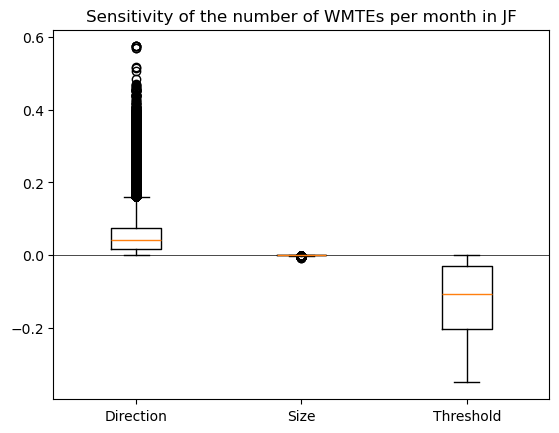

In [29]:
plt.boxplot(diffs,labels=["Direction","Size","Threshold"])
plt.axhline(0,c="k",lw="0.5")
plt.title("Sensitivity of the number of WMTEs per month in JF")

# plt.ylim(-1000,100)

We have calculated the differential along each parameter at each grid point, and divided by the central parameter value

#### Spatial map of rate of change

In [13]:
dataPath = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/data/mjoClassFracs."
totalLoc = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/data/mjoClassTotals.pkl"

directions = [40,45,50]
sizes = [750,1000,1500]
thresholds = [60,70,80]

lonMin = 25
lonMax = 35
latMin = -13
latMax = -7

In [14]:
data = []

for dir in directions:
    for size in sizes:
        for threshold in thresholds:
            filePath = f"{dataPath}dir.{dir}_thresh.{threshold}_size.{size}.nc"
            ds = xr.open_dataset(filePath)

            ds = ds.drop_vars(["level","quantile"])

            box = ds #.sel(latitude=slice(latMax,latMin),longitude=slice(lonMin,lonMax))

            # boxAvg.assign_coords({"dir":dir,"size":size,"threshold":threshold})

            box = box.expand_dims(dir=1).assign_coords(dir=[dir])#("dir",[dir]))
            box = box.expand_dims(size=1).assign_coords(size=[size])#("size",[size]))
            box = box.expand_dims(threshold=1).assign_coords(threshold=[threshold])#("threshold",[threshold]))

            data.append(box)

In [15]:
combined = xr.combine_by_coords(data)

with open(totalLoc, "rb") as f:
    seasonTotals = pickle.load(f)


seasons = ["JF","MAM","JJAS","OND"]

years = np.arange(1980,2023)

for seasonix, season in enumerate(seasons):
    for MJOix, MJO_class in enumerate(combined["MJO_class"].values):

        seasonClassNumberDays = seasonTotals[season][MJO_class] # number of days in that class and season

        nmonths = len(season)

        seasonClassNumberDaysPerMonth = seasonClassNumberDays / (nmonths*len(years)) # average number of days in that class and season per month

        combined[season].loc[:,:,:,MJO_class] *=  seasonClassNumberDaysPerMonth

In [16]:
monthTotals["JF"].sel(latitude=-10,longitude=30,dir=40,size=1000)

NameError: name 'monthTotals' is not defined

In [17]:
monthTotals = combined.sum(dim="MJO_class")

dirDifferential = (monthTotals.diff("dir")).mean(dim=["dir","size","threshold"]) / 5
sizeDifferential = (monthTotals.diff("size")).mean(dim=["dir","size","threshold"]) / 375
threshDifferential = (monthTotals.diff("threshold")).mean(dim=["dir","size","threshold"]) / 10

maps = [dirDifferential,sizeDifferential,threshDifferential]

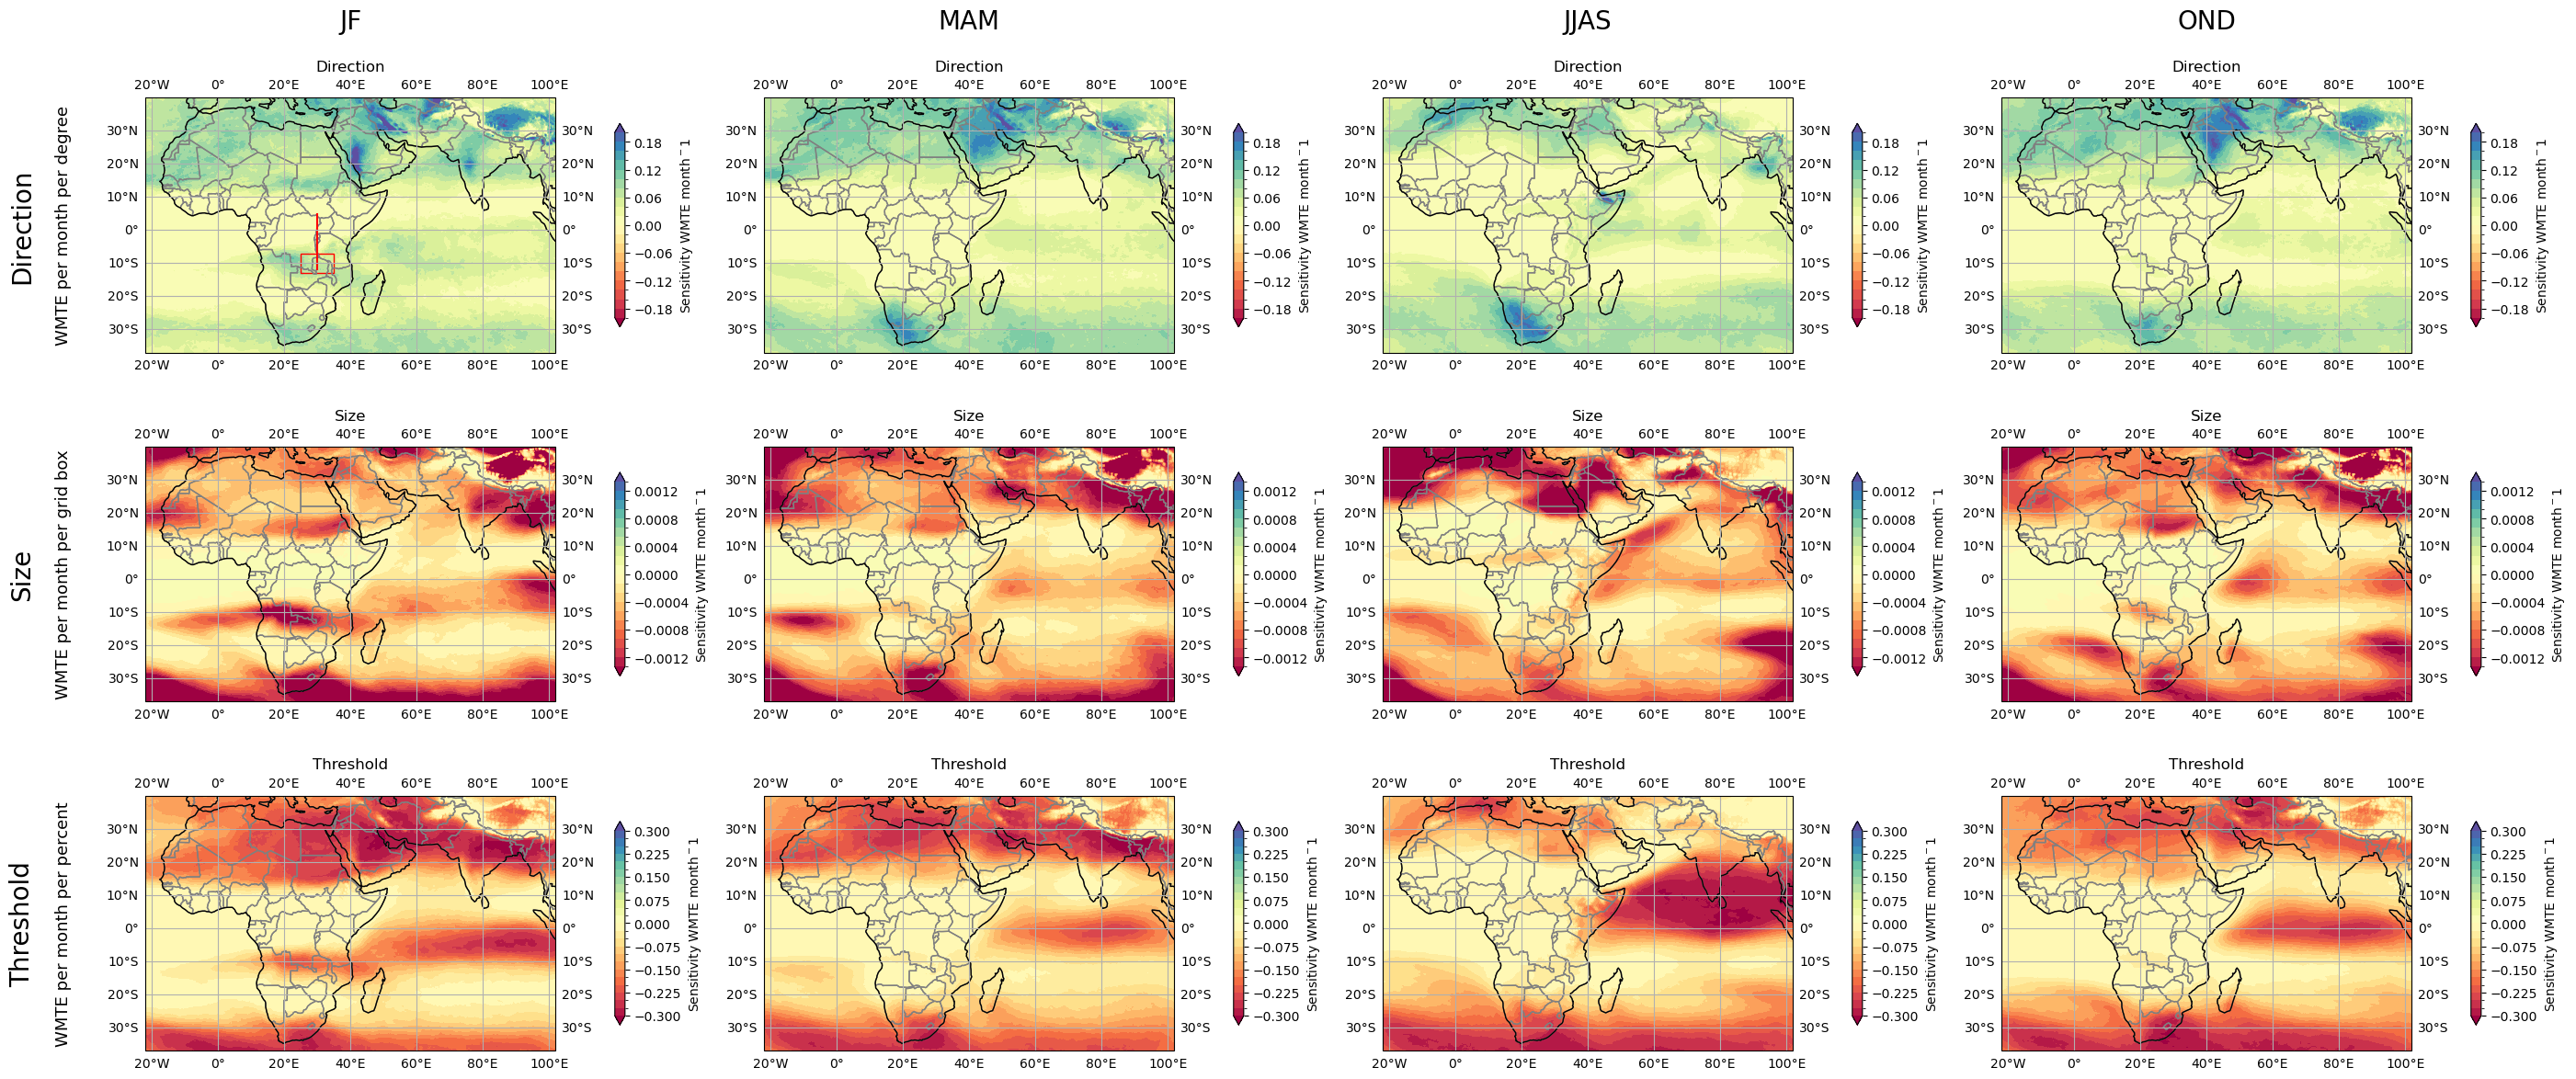

In [18]:
fig,axs = tct.new_map_axes(nrows=3,ncols=4)

names = ["Direction","Size","Threshold"]
units = ["per degree","per grid box","per percent"]

cmap = plt.get_cmap("Spectral")

levels = [np.arange(-1,1.1,0.1) / 5, np.arange(-0.5,0.55,0.05) / 375, np.arange(-3,3.25,0.25) / 10]

for seasonix,season in enumerate(seasons):

    col = axs[:,seasonix]
    col[0].text(s=season,x=0.5,y=1.3,size=20,transform=col[0].transAxes,ha="center",va="center")

    for iax, ax in enumerate(col):
        name = names[iax]
        im=maps[iax][season].plot.contourf(ax=ax,cmap=cmap,levels=levels[iax],extend="both",cbar_kwargs=dict(shrink=0.6,label=f"Sensitivity WMTE month$^{-1}$"))
        ax.set_title(f"{name}")

for iax,ax in enumerate(axs[:,0]):
    ax.text(s=f"{names[iax]}",x=-0.3,y=0.5,size=20,transform=ax.transAxes,ha="center",va="center",rotation=90)
    ax.text(s=f"WMTE per month {units[iax]}",x=-0.2,y=0.5,size=13,transform=ax.transAxes,ha="center",va="center",rotation=90)

# Parameters: (x, y) for bottom-left corner, width, height
rectangle = Rectangle((lonMin,latMin), lonMax-lonMin, latMax-latMin, ec='red', fill=False)

# Add the rectangle to the axis
axs[0,0].add_patch(rectangle)
axs[0,0].vlines(30,5,-12,color="red")


In [35]:
monthTotals = combined.sum(dim="MJO_class")

dirSensitivity = abs(5/(monthTotals.diff("dir")).mean(dim=["dir","size","threshold"]))
sizeSensitivity  = abs(375/(monthTotals.diff("size")).mean(dim=["dir","size","threshold"]))
threshSensitivity  = abs(10/(monthTotals.diff("threshold")).mean(dim=["dir","size","threshold"]))

maps = [dirSensitivity ,sizeSensitivity ,threshSensitivity]

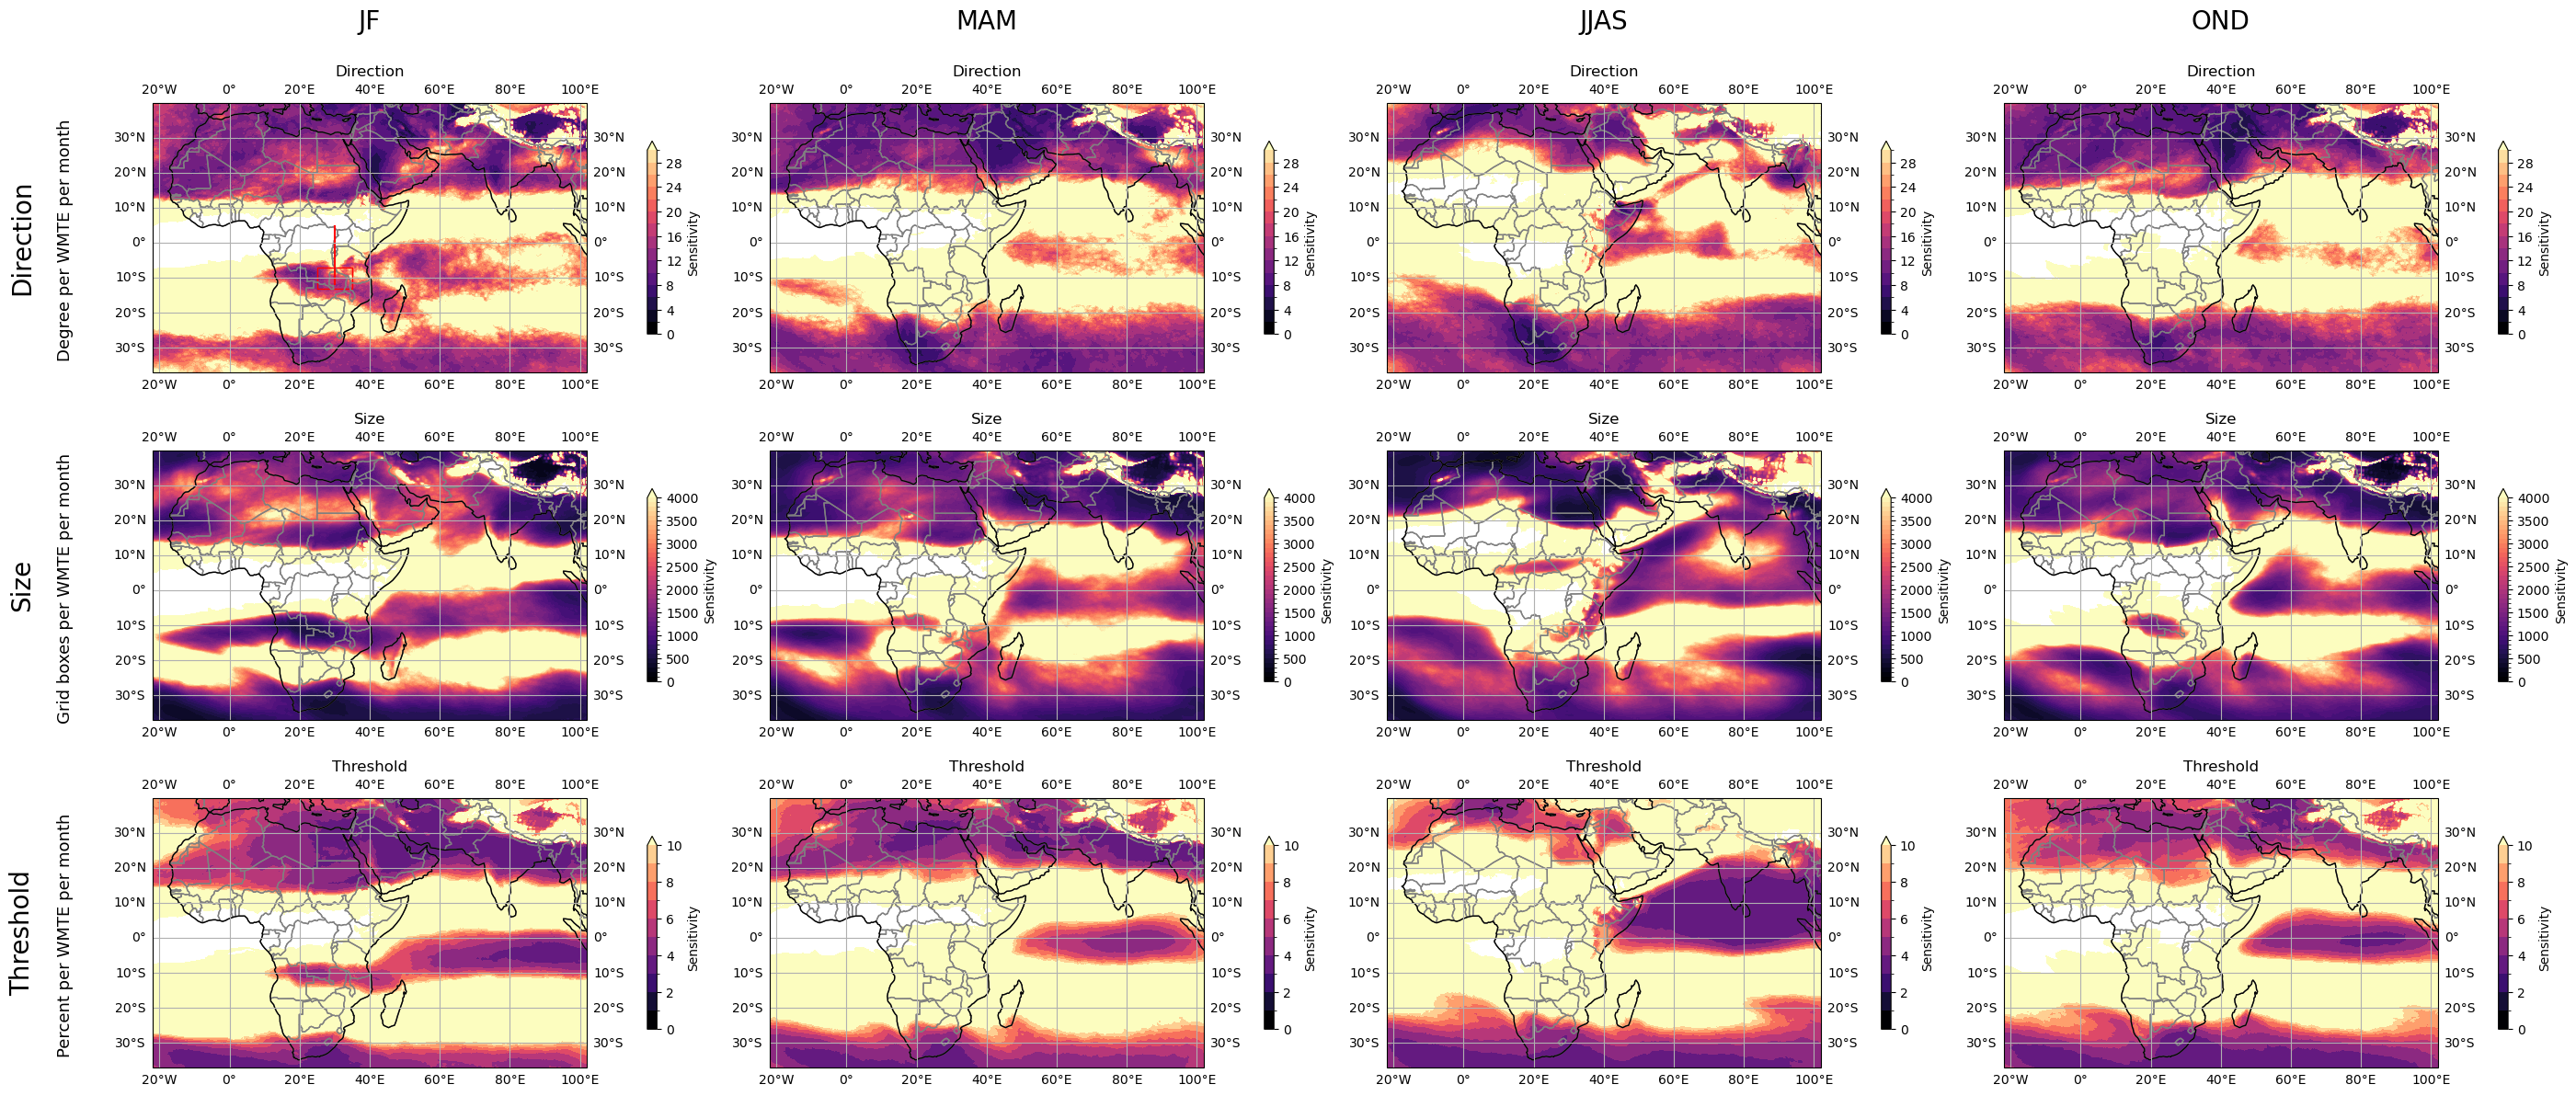

In [46]:
fig,axs = tct.new_map_axes(nrows=3,ncols=4)

names = ["Direction","Size","Threshold"]
units = ["Degree","Grid boxes","Percent"]

cmap = plt.get_cmap("magma")

levels = [np.arange(0,31,2), np.arange(0,4001,100), np.arange(0,11,1)]

for seasonix,season in enumerate(seasons):

    col = axs[:,seasonix]
    col[0].text(s=season,x=0.5,y=1.3,size=20,transform=col[0].transAxes,ha="center",va="center")

    for iax, ax in enumerate(col):
        name = names[iax]
        im=maps[iax][season].plot.contourf(ax=ax,cmap=cmap,extend="max",levels=levels[iax],cbar_kwargs=dict(shrink=0.6,label=f"Sensitivity"))
        ax.set_title(f"{name}")

for iax,ax in enumerate(axs[:,0]):
    ax.text(s=f"{names[iax]}",x=-0.3,y=0.5,size=20,transform=ax.transAxes,ha="center",va="center",rotation=90)
    ax.text(s=f"{units[iax]} per WMTE per month ",x=-0.2,y=0.5,size=13,transform=ax.transAxes,ha="center",va="center",rotation=90)

# Parameters: (x, y) for bottom-left corner, width, height
rectangle = Rectangle((lonMin,latMin), lonMax-lonMin, latMax-latMin, ec='red', fill=False)

# Add the rectangle to the axis
axs[0,0].add_patch(rectangle)
axs[0,0].vlines(30,5,-12,color="red")
